# #10 Scientific Python

1. [Numpy](#Numpy)
    1. [ndarray](#ndarray)
    2. [Vectorization](#Vectorization)
    3. [Indexing](#Indexing)
    4. [Swapping axes](#Swapping-axes)
    5. [Universal functions](#Universal-functions)
    6. [Data processing](#Data-processing)
    7. [Useful logic](#Useful-logic)
    8. [Linear Algebra](#Linear-Algebra)
    9. [Random](#Random)
2. [Advanced Numpy](#Advanced-Numpy)
    1. [Array internals](#Array-internals)
    2. [Manipulation](#Manipulation)
    3. [Take](#Take)
    4. [Broadcasting](#Broadcasting)
    5. [ufunc](#ufunc)
    6. [Structured arrays](#Structured-arrays)
    7. [Memmap files](#Memmap-files)
    8. [HDF5](#HDF5)
3. [IPython](#IPython)

## Numpy

Features
* ndarray, a fast and space-efficient multidimensional array providing vectorized arithmetic operations and  broadcasting capabilities
* Standard mathematical functions for fast operations on entire arrays of data without having to write loops
* Tools for reading / writing array data to disk and working with memory-mapped files
* Linear algebra, random number generation, and Fourier transform capabilities
* Tools for integrating code written in C, C++, and Fortran

In [2]:
import numpy as np

#### ndarray

ndarray is a generic multidimensional container for homogeneous data

__Why it is useful__: Memory-efficient container that provides fast numerical operations.

In [38]:
L = range(1000)
%timeit [i**2 for i in L]

10000 loops, best of 3: 102 µs per loop


In [39]:
a = np.arange(1000)
%timeit a**2

The slowest run took 53.87 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.69 µs per loop


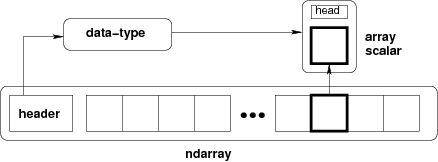

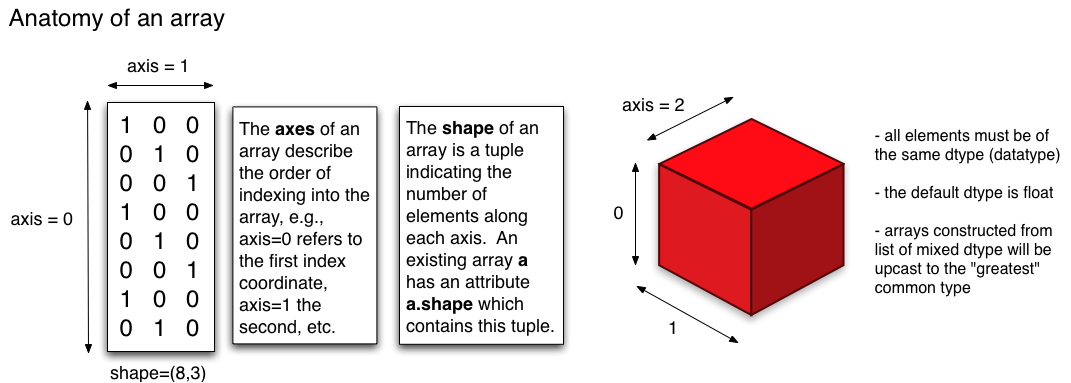

In [29]:
print(np.array([6, 7.5, 8, 0, 1]))
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(arr)

[ 6.   7.5  8.   0.   1. ]
[[1 2 3 4]
 [5 6 7 8]]


In [40]:
print(len(arr), arr.ndim, arr.shape, arr.dtype)

2 2 (2, 4) int64


In [35]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [36]:
np.empty((2, 3, 2))

array([[[ -1.28822975e-231,  -1.29074499e-231],
        [  2.24892181e-314,   2.24559126e-314],
        [  2.24576933e-314,   2.24897990e-314]],

       [[  2.24528805e-314,   0.00000000e+000],
        [  2.24207087e-314,   2.24528815e-314],
        [ -1.28822975e-231,   8.34402697e-309]]])

In [37]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Custom type and casting

In [43]:
ints = np.array([1, 2, 3], dtype=np.uint32)
floats = np.asarray(ints, dtype=np.float64)
print(ints.dtype, floats.dtype)

uint32 float64


In [56]:
a = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 0.0])
print(repr(a.astype("f4"))) # by default, astype always returns a newly allocated array
print(repr(a.astype("?")))

array([  3.70000005,  -1.20000005,  -2.5999999 ,   0.5       ,
        12.89999962,   0.        ], dtype=float32)
array([ True,  True,  True,  True,  True, False], dtype=bool)


#### Vectorization

Vectorized operations in NumPy are implemented in C, resulting in a significant speed improvement.

In [59]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr)

[[ 1.  2.  3.]
 [ 4.  5.  6.]]


In [58]:
arr * arr

array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.]])

In [61]:
1 / arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

#### Indexing

In [63]:
a = np.arange(10)
print(a[0], a[2], a[-1])
print(a[5:8], a[::-1])

0 2 9
[5 6 7] [9 8 7 6 5 4 3 2 1 0]


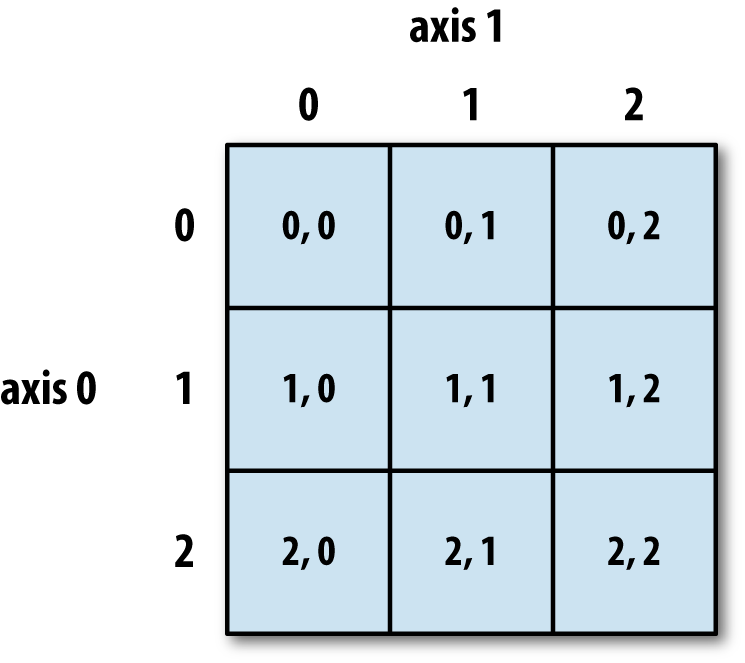

In 2D, the first dimension corresponds to rows, the second to columns.

In [64]:
a = np.diag(np.arange(3))
print(a)

[[0 0 0]
 [0 1 0]
 [0 0 2]]


In [75]:
print(a[0], a[1, 1], a[:,0])

[0 0 0] 1 [0 0 0]


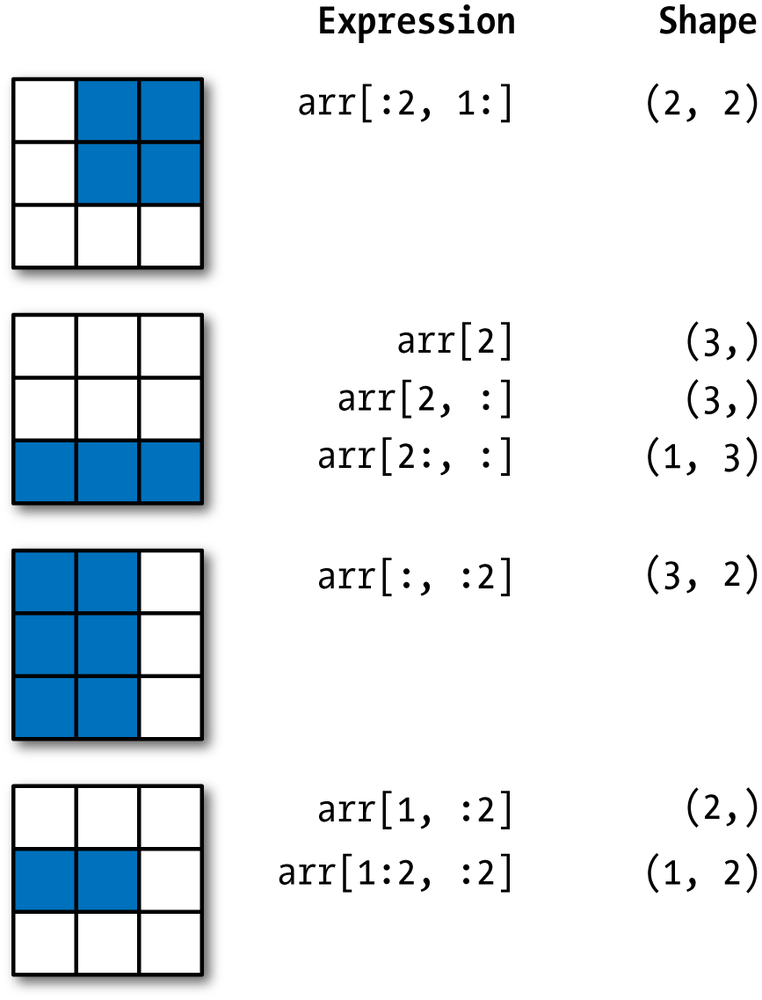

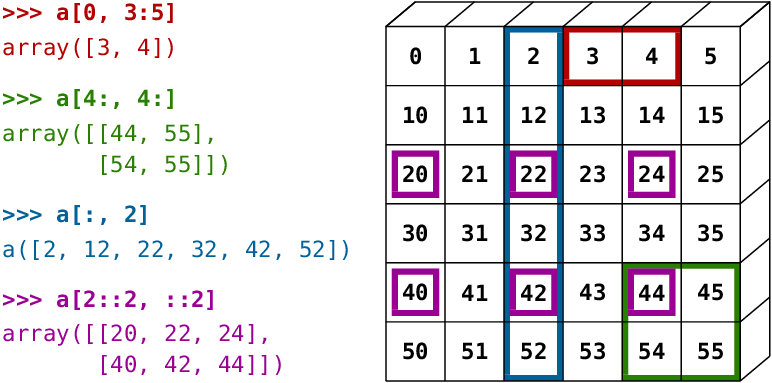

In [76]:
a = np.arange(10)
b = np.arange(5)
a[5:] = b[::-1]
print(a)

[0 1 2 3 4 4 3 2 1 0]


In [77]:
a[5:8] = 12
print(a)

[ 0  1  2  3  4 12 12 12  1  0]


Distinction from lists is that array slices are views on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array

In [90]:
arr_slice = a[5:8]
arr_slice[1] = 12345
print(arr_slice, a)
print(np.may_share_memory(a, arr_slice))

arr_slice = a[5:8].copy()
arr_slice[1] = 42
print(arr_slice, a)
print(np.may_share_memory(a, arr_slice))

[   12 12345    12] [    0     1     2     3     4    12 12345    12     1     0]
True
[12 42 12] [    0     1     2     3     4    12 12345    12     1     0]
False


__Fancy indexing and masks__

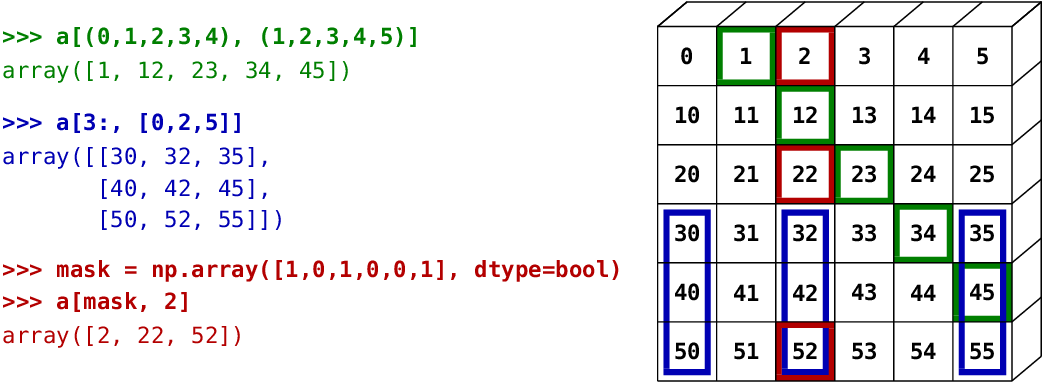

In [109]:
arr = np.arange(32).reshape((8, 4))
# way out of fancy indexing
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Selecting data from an array by boolean indexing always creates a copy of the data, even if the returned array is unchanged.

In [104]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
print(data)

[[-1.5283478   0.14010683  0.53824511 -0.75336366]
 [-0.22091988  0.96924309  1.59868625 -0.32078323]
 [-0.31032688  0.66723839 -0.22176843 -0.11273209]
 [-0.36003392  0.08011902 -0.30371939 -0.05114867]
 [ 0.81419198  0.90813287  1.20924253  0.31264547]
 [ 1.01418072  0.01655871 -0.01551554  1.52435163]
 [ 1.00323696  0.24219676 -0.46400084 -0.70154431]]


In [105]:
print(names == 'Bob')
print(data[names == 'Bob'])

[ True False False  True False False False]
[[-1.5283478   0.14010683  0.53824511 -0.75336366]
 [-0.36003392  0.08011902 -0.30371939 -0.05114867]]


In [106]:
print(~(names == 'Bob'))
data[~(names == 'Bob')]

[False  True  True False  True  True  True]


array([[-0.22091988,  0.96924309,  1.59868625, -0.32078323],
       [-0.31032688,  0.66723839, -0.22176843, -0.11273209],
       [ 0.81419198,  0.90813287,  1.20924253,  0.31264547],
       [ 1.01418072,  0.01655871, -0.01551554,  1.52435163],
       [ 1.00323696,  0.24219676, -0.46400084, -0.70154431]])

In [107]:
mask = (names == 'Bob') | (names == 'Will')
data[mask]

array([[-1.5283478 ,  0.14010683,  0.53824511, -0.75336366],
       [-0.31032688,  0.66723839, -0.22176843, -0.11273209],
       [-0.36003392,  0.08011902, -0.30371939, -0.05114867],
       [ 0.81419198,  0.90813287,  1.20924253,  0.31264547]])

In [108]:
data[data < 0] = 0
print(data)

[[ 0.          0.14010683  0.53824511  0.        ]
 [ 0.          0.96924309  1.59868625  0.        ]
 [ 0.          0.66723839  0.          0.        ]
 [ 0.          0.08011902  0.          0.        ]
 [ 0.81419198  0.90813287  1.20924253  0.31264547]
 [ 1.01418072  0.01655871  0.          1.52435163]
 [ 1.00323696  0.24219676  0.          0.        ]]


#### Swapping axes

In [110]:
arr = np.arange(15).reshape((3, 5))
print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [112]:
print np.dot(arr.T, arr)

[[125 140 155 170 185]
 [140 158 176 194 212]
 [155 176 197 218 239]
 [170 194 218 242 266]
 [185 212 239 266 293]]


In [120]:
arr = np.arange(16).reshape((2, 2, 4))
print(arr)
arr.transpose((1, 0, 2))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

#### Universal functions

A universal function, or ufunc, is a function that performs elementwise operations on data in ndarrays. You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results

Unary

In [124]:
arr = np.arange(10)
print(np.sqrt(arr))
print(np.exp(arr))

[ 0.          1.          1.41421356  1.73205081  2.          2.23606798
  2.44948974  2.64575131  2.82842712  3.        ]
[  1.00000000e+00   2.71828183e+00   7.38905610e+00   2.00855369e+01
   5.45981500e+01   1.48413159e+02   4.03428793e+02   1.09663316e+03
   2.98095799e+03   8.10308393e+03]


Binary

In [127]:
x, y = np.random.randn(8), np.random.randn(8)
print(x)
print(y)
print()
print(np.maximum(x, y))

[-0.0526312  -0.9955059   0.82856087 -1.28964816 -0.273294    0.10774261
  2.07571425 -1.53375676]
[ 0.9305797   0.74073933  0.96984468 -1.67614748 -1.87912671 -0.45555303
  0.08506365 -0.17664835]

[ 0.9305797   0.74073933  0.96984468 -1.28964816 -0.273294    0.10774261
  2.07571425 -0.17664835]


In [130]:
np.modf(np.random.randn(5)) # ala divmod

(array([-0.71641407, -0.01451731, -0.01178657,  0.55398804, -0.83583185]),
 array([-0., -1., -0.,  0., -0.]))

#### Data processing

__Where__

In [131]:
arr = np.random.randn(4, 4)
np.where(arr > 0, 2, -2)

array([[-2,  2,  2,  2],
       [-2, -2, -2, -2],
       [ 2, -2, -2,  2],
       [-2,  2, -2,  2]])

In [132]:
np.where(arr > 0, 2, arr)

array([[-0.39449122,  2.        ,  2.        ,  2.        ],
       [-0.71261857, -1.00231704, -0.44702208, -1.03565278],
       [ 2.        , -0.39487002, -0.03649379,  2.        ],
       [-0.07754572,  2.        , -1.898401  ,  2.        ]])

__Math__

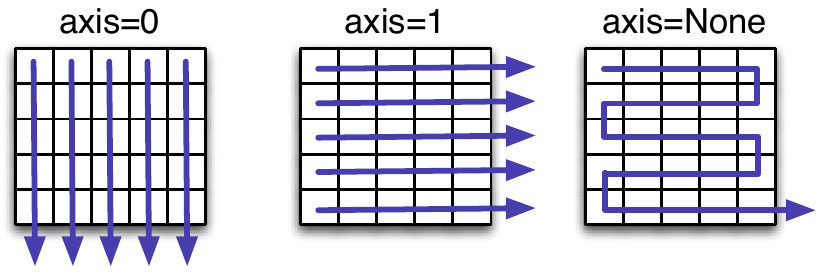

In [140]:
arr = np.random.randn(5, 4)
print(arr)

[[-0.81066714 -0.25991019 -0.31942067  0.23807803]
 [ 0.57812932 -1.04518508  1.71979807 -1.59440689]
 [-0.85400688 -0.70706047  0.11041581  0.12781889]
 [-0.07491424  0.20065137 -1.60130393 -0.26431021]
 [-0.03797753  1.18394037 -1.04056677 -0.20872655]]


In [141]:
print(arr.mean())
print(np.mean(arr))

-0.232981233234
-0.232981233234


In [142]:
arr.sum()

-4.659624664685567

In [143]:
arr.mean(axis=1)

array([-0.28797999, -0.08541614, -0.33070816, -0.43496925, -0.02583262])

In [144]:
arr.sum(0)

array([-1.19943646, -0.62756399, -1.13107748, -1.70154673])

In [145]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr.cumsum(0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [146]:
arr.cumprod(1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

In [147]:
bools = np.array([False, False, True, False])
(bools > 0).sum()

1

In [148]:
print(bools.any(), bools.all())

True False


In [150]:
large_arr = np.random.randn(1000)
large_arr.sort() # in-place unlike np.sort
large_arr[int(0.95 * len(large_arr))] # 95% quantile

1.5183174933926218

#### Useful logic

In [151]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], 
      dtype='|S4')

In [152]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

#### Linear Algebra

In [153]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x.dot(y) # equivalently np.dot(x, y)

array([[  28.,   64.],
       [  67.,  181.]])

In [154]:
np.dot(x, np.ones(3))

array([  6.,  15.])

In [158]:
X = np.random.randn(5, 5)
mat = np.linalg.inv(X.T.dot(X))
mat

array([[ 5.20153352, -5.03635007,  3.31837909, -1.58592535, -0.16351534],
       [-5.03635007,  5.0480224 , -3.28273136,  1.57140996,  0.14823926],
       [ 3.31837909, -3.28273136,  2.22971043, -1.01626388, -0.06433517],
       [-1.58592535,  1.57140996, -1.01626388,  0.57474114,  0.08174633],
       [-0.16351534,  0.14823926, -0.06433517,  0.08174633,  0.37792932]])

In [164]:
q, r = np.linalg.qr(mat)
print(q, r)

[[-0.64038917 -0.72596203  0.143584   -0.16152984  0.12717149]
 [ 0.62005253 -0.67007542 -0.31569834  0.257908   -0.01875671]
 [-0.40854375  0.0947695  -0.81906296  0.2014221  -0.33567208]
 [ 0.19525192 -0.06546543 -0.19785017 -0.90468443 -0.31621567]
 [ 0.02013127  0.10349436 -0.41195796 -0.21992449  0.87795644]] [[-8.12245709  8.00620751 -5.27117678  2.51901936  0.24648264]
 [ 0.         -0.12499067  0.06184071 -0.0271178   0.04703943]
 [ 0.          0.         -0.08588287 -0.03880961 -0.18944704]
 [ 0.          0.          0.         -0.08118191 -0.10538437]
 [ 0.          0.          0.          0.          0.30397656]]


#### Random

In [166]:
from random import normalvariate
N = 1_000_000

In [167]:
%timeit samples = [normalvariate(0, 1) for _ in xrange(N)]

1 loop, best of 3: 1.29 s per loop


In [168]:
%timeit np.random.normal(size=N)

10 loops, best of 3: 54.7 ms per loop


Random walk

In [169]:
import random
position = 0
walk = [position]
steps = 1000
for i in xrange(steps):
    step = 1 if random.randint(0, 1) else -1 # random.choice([-1, 1])
    position += step
    walk.append(position)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 31 µs


In [173]:
nsteps = 1000
nwalks = 5000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [174]:
hits30 = (np.abs(walks) >= 30).any(1)

In [175]:
print(hits30.sum())
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

3347


503.32685987451447

### References

* https://arxiv.org/pdf/1102.1523.pdf
* http://www.scipy-lectures.org/index.html

### Summary

* numpy is highly efficient scientific computing package
* remember that not all operations return copy of array
* you can express alot of task in numpy, but sometimes it gets tricky

## Advanced Numpy

#### Array internals

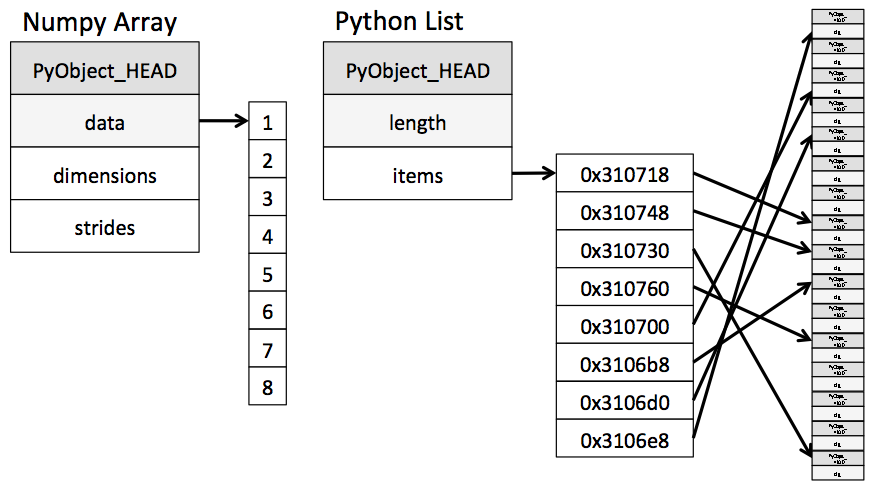

Strides - the number of bytes to jump to find the next element, 1 stride per dimension

In [3]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], dtype=np.int8)
print(x.strides)
byte_offset = 3*1 + 1*2   # to find x[1, 2]
print(x.flat[byte_offset] == x[1, 2] == 6)

(3, 1)
True


__ndarray__ = block of memory + indexing scheme + data type descriptor
* raw data
* how to locate an element
* how to interpret an element

In [ ]:
typedef struct PyArrayObject {
        PyObject_HEAD

        /* Block of memory */
        char *data;

        /* Data type descriptor */
        PyArray_Descr *descr;

        /* Indexing scheme */
        int nd;
        npy_intp *dimensions;
        npy_intp *strides;

        /* Other stuff */
        PyObject *base;
        int flags;
        PyObject *weakreflist;
} PyArrayObject;

In [176]:
ints = np.ones(10, dtype=np.uint16)
floats = np.ones(10, dtype=np.float32)

In [177]:
np.issubdtype(ints.dtype, np.integer)

True

In [178]:
np.issubdtype(floats.dtype, np.floating)

True

In [179]:
np.float64.mro()

[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

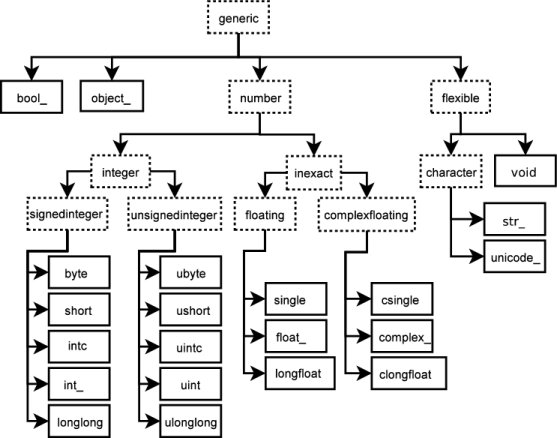

#### Manipulation

In [181]:
arr = np.arange(8)
arr.reshape((4, 2)).reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [184]:
arr.reshape(8, -1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [186]:
arr = np.arange(15).reshape((5, 3))
arr.ravel() # returns view
arr.flatten() # returns copy

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

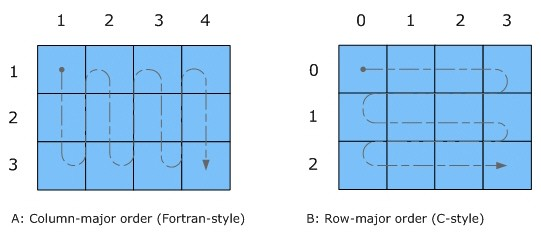

* C / row major order: traverse higher dimensions first (e.g. axis 1 before advancing on axis 0).
* Fortran / column major order: traverse higher dimensions last (e.g. axis 0 before advancing on axis 1).

In [188]:
print(arr)
arr.ravel('F')

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


array([ 0,  3,  6,  9, 12,  1,  4,  7, 10, 13,  2,  5,  8, 11, 14])

__Concatenation__

In [189]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])

In [190]:
np.concatenate([arr1, arr2]) # axis=0

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [192]:
print(np.vstack((arr1, arr2)))
print() 
print(np.hstack((arr1, arr2)))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


In [195]:
print(np.r_[arr1, arr2])
print()
print(np.c_[np.r_[arr1, arr2], np.r_[arr1, arr2]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[[ 1  2  3  1  2  3]
 [ 4  5  6  4  5  6]
 [ 7  8  9  7  8  9]
 [10 11 12 10 11 12]]


In [196]:
np.c_[1:6, -10:-5]

array([[  1, -10],
       [  2,  -9],
       [  3,  -8],
       [  4,  -7],
       [  5,  -6]])

#### Take

In [198]:
arr = np.random.randn(1000, 50)
inds = np.random.permutation(1000)[:500]

In [199]:
%timeit arr[inds]

The slowest run took 68.82 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 29.2 µs per loop


In [200]:
%timeit arr.take(inds, axis=0)

The slowest run took 19.64 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 32.3 µs per loop


#### Broadcasting

Broadcasting describes how arithmetic works between arrays of different shapes.

In [5]:
arr = np.random.randn(4, 3)
means = arr.mean(0)
print(means.shape, means)
arr - means

(3,) [-0.21749765 -0.81152689 -0.14937076]


array([[ 0.29288081, -0.73984827, -0.1780558 ],
       [ 0.51454823, -0.5146914 , -0.37884793],
       [-0.691896  ,  1.31146869,  1.07951053],
       [-0.11553305, -0.05692902, -0.5226068 ]])

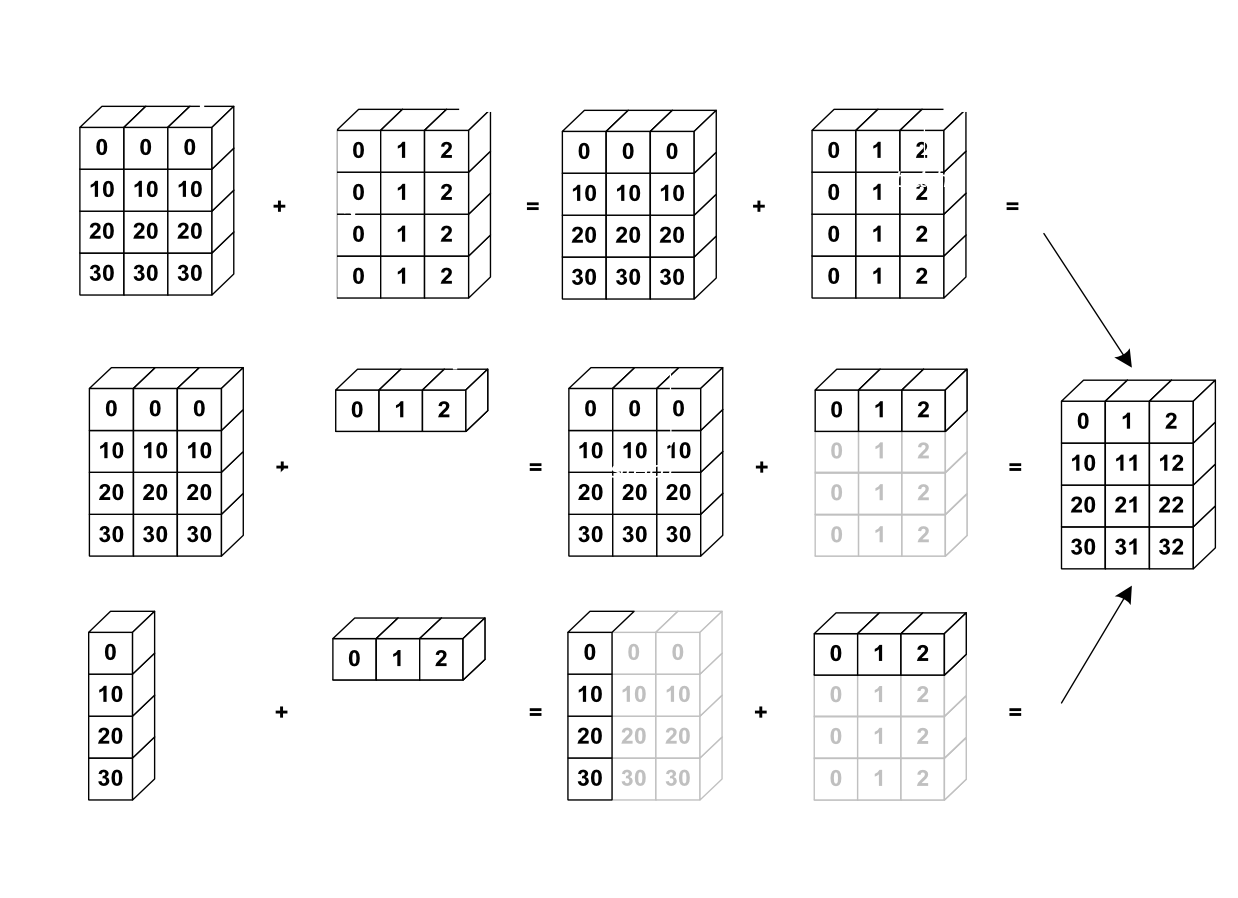

Two arrays are compatible for broadcasting if for each trailing dimension (that is, starting from the end), the axis lengths match or if either of the lengths is 1. Broadcasting is then performed over the missing and / or length 1 dimensions.

In [7]:
row_means = arr.mean(1)
print(row_means.reshape((4, 1)))
arr - row_means.reshape((4, 1))

[[-0.60113952]
 [-0.5191288 ]
 [ 0.17356264]
 [-0.62448806]]


array([[ 0.67652268, -0.95023564,  0.27371296],
       [ 0.81617938, -0.80708949, -0.0090899 ],
       [-1.08295629,  0.32637916,  0.75657713],
       [ 0.29145736, -0.24396785, -0.04748951]])

In [206]:
arr - row_means

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

A very common problem, therefore, is needing to add a new axis with length 1 specifically for broadcasting purposes, especially in generic algorithms

In [208]:
arr = np.zeros((4, 4))
print(arr[:, np.newaxis, :])

[[[ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]]]


In [213]:
arr = np.random.normal(size=3)
arr[:, np.newaxis]

array([[-0.61701984],
       [ 0.00281057],
       [-0.93447975]])

In [223]:
arr = np.random.randn(3, 4, 5)
depth_means = arr.mean(2)
arr - depth_means[:, :, np.newaxis]

array([[[-0.85287958, -1.35459113,  0.97692104,  0.05476798,  1.17578169],
        [ 1.15806608, -0.48684018, -0.87825412,  1.86777637, -1.66074815],
        [-1.44705179,  0.99661449,  0.86775399,  0.73727199, -1.15458868],
        [ 0.40009561, -0.75291318, -0.09097074,  0.11331774,  0.33047057]],

       [[-1.17539817,  0.13107328,  0.06891551,  0.66748932,  0.30792006],
        [-0.09687255, -0.62969822,  0.14962286,  0.3227205 ,  0.25422742],
        [-0.77496947, -0.90789685,  1.21264946,  0.84090487, -0.37068801],
        [ 1.70781003, -1.74800037, -0.80589431,  0.15285967,  0.69322498]],

       [[-0.74810075,  1.19761387, -0.62800485,  0.88251681, -0.70402508],
        [ 1.51633739, -2.22151518,  0.89402991,  0.03370215, -0.22255428],
        [-0.37045777, -0.03545737, -0.45220015, -0.15127919,  1.00939447],
        [ 0.12220496,  0.63164982,  1.1342667 , -2.26277011,  0.37464863]]])

Value setting by broadcasting

In [224]:
arr = np.zeros((4, 3))
arr[:] = 5
arr

array([[ 5.,  5.,  5.],
       [ 5.,  5.,  5.],
       [ 5.,  5.,  5.],
       [ 5.,  5.,  5.]])

In [226]:
col = np.array([1.1, 1.2, 1.3, 1.4])
arr[:] = col[:, np.newaxis]
print(arr)
arr[:2] = [[-1.37], [0.509]]
print()
print(arr)

[[ 1.1  1.1  1.1]
 [ 1.2  1.2  1.2]
 [ 1.3  1.3  1.3]
 [ 1.4  1.4  1.4]]

[[-1.37  -1.37  -1.37 ]
 [ 0.509  0.509  0.509]
 [ 1.3    1.3    1.3  ]
 [ 1.4    1.4    1.4  ]]


#### ufunc

In [227]:
arr = np.arange(10)
np.add.reduce(arr)

45

`outer` performs a pairwise cross-product between two arrays

`reduceat`, performs a “local reduce”, in essence an array groupby operation in which slices of the array are aggregated together

In [229]:
arr = np.multiply.outer(np.arange(4), np.arange(5))
print(arr)
np.add.reduceat(arr, [0, 2, 4], axis=1)

[[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]]


array([[ 0,  0,  0],
       [ 1,  5,  4],
       [ 2, 10,  8],
       [ 3, 15, 12]])

Custom ufuncs

In [230]:
def add_elements(x, y):
    return x + y

In [231]:
add_them = np.frompyfunc(add_elements, 2, 1)
add_them(np.arange(8), np.arange(8))

array([0, 2, 4, 6, 8, 10, 12, 14], dtype=object)

#### Structured arrays

 A structured array is an ndarray in which each element can be thought of as representing a struct in C or a row in a SQL table with multiple named fields

In [235]:
dtype = [('x', np.float64), ('y', np.int32)]
sarr = np.array([(1.5, 6), (np.pi, -2)], dtype=dtype)
sarr

array([(1.5, 6), (3.141592653589793, -2)], 
      dtype=[('x', '<f8'), ('y', '<i4')])

In [236]:
print(sarr[0])
print(sarr[0]['y'])
print(sarr['x'])

(1.5, 6)
6
[ 1.5         3.14159265]


In [238]:
dtype = [('x', np.int64, 3), ('y', np.int32)]
arr = np.zeros(4, dtype=dtype)
print(repr(arr))
print(arr['x'])

array([([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0)], 
      dtype=[('x', '<i8', (3,)), ('y', '<i4')])
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


Since each element in the array is represented in memory as a fixed number of bytes, structured arrays provide a very fast and efficient way of writing data to and from disk, transporting it over the network, and other such use.

#### Memmap files

In [239]:
mmap = np.memmap('mymmap', dtype='float64', mode='w+', shape=(10000, 10000))
mmap

memmap([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [240]:
section = mmap[:5]
section[:] = np.random.randn(5, 10000)
mmap.flush()
mmap

memmap([[ 0.29049663,  1.15759966,  0.45075893, ...,  1.34041625,
         0.2451881 ,  0.56982174],
       [-0.12917797,  0.77892388, -0.95957207, ...,  0.16777609,
         0.65702339,  0.31122661],
       [-1.23377841,  0.92217495,  1.21583828, ..., -0.42829195,
        -0.62919348, -0.51406487],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [241]:
del mmap

#### HDF5

In [ ]:
class HDFStore(object):
    def __init__(self, store):
        store_name, self.store_key = store
        self.storage = pd.HDFStore(store_name)

    def get(self, key=None):
        key = key if key else self.store_key
        try:
            return self.storage[key]
        except:
            return None

    def put(self, data, key=None):
        key = key if key else self.store_key
        self.storage[key] = data

### References

* https://docs.scipy.org/doc/numpy/reference/internals.html
* https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html#internal-memory-layout-of-an-ndarray
* http://eli.thegreenplace.net/2015/memory-layout-of-multi-dimensional-arrays/

### Summary

* Convert Python loops and conditional logic to array operations and boolean array operations
* Use broadcasting whenever possible
* Avoid copying data using array views (slicing)
* Utilize ufuncs and ufunc methods

## IPython

In [1]:
%quickref

Tab comleteion
* names
* paths

__Introspection__

In [2]:
b = [1, 2, 3]
b?

In [256]:
str.split?

In [3]:
import uuid
uuid.uuid4??

In [4]:
str.*split*?

__Run__

In [ ]:
# %load /Users/s.stupnikov/Dropbox/Teaching/Otus/lection10/gcd.py
def gcd(a, b):
    """Computes the greatest common divisor of integers a and b using
        Euclid's Algorithm.
    """
    while True:
        if b == 0:
            return a
        a, b = b, a % b

print(gcd(23424, 5654))


In [27]:
%run gcd.py

2


__Magic__

In [5]:
%magic

In [15]:
import numpy as np

In [17]:
a = np.random.randn(100, 100)
%timeit np.dot(a, a)

The slowest run took 365.56 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 96.6 µs per loop


In [6]:
%reset?

__Search and history__

In [41]:
%hist

%%quickref
%quickref
b = [1, 2, 3]
b?
b = [1, 2, 3]
b?
str.split?
str.split??
def gcd(a, b):
    """Computes the greatest common divisor of integers a and b using
    Euclid's Algorithm.
    """
    while True:
        if b == 0:
            return a
        a, b = b, a % b
gcd?
import uuid
uuid.uuid4??
str.split?
str.*split*?
%run gcd.py
print a, b
%run gcd.py
import numpy as np
a = np.random.randn(100, 100)
a = np.random.randn(100, 100)
%timeit np.dot(a, a)
%reset?
'a' in _ip.user_ns
%magic
print _
%run gcd.py
print _
%run gcd.py
print _
%run gcd.py
%run gcd.py
366*31*24*60*60
print _
_ * 10
366*31*24*60*60
_ * 2
print _, __
two_years_sec = 980294400
print _i34, _34
two_years_sec = 980294400
two_years_sec
print _i36, _36
print _i36
print _i36
print _36
exec _i36
%hist


In [31]:
366*31*24*60*60

980294400

In [32]:
_ * 2

1960588800

In [33]:
print(_, __)

1960588800 980294400


In [36]:
two_years_sec = 980294400
two_years_sec

980294400

In [39]:
print(_i36)
print(_36)

two_years_sec = 980294400
two_years_sec
980294400


In [40]:
exec(_i36)

Use %xdel and %reset to allow GC remove old objects

In [42]:
%logstart

Activating auto-logging. Current session state plus future input saved.
Filename       : ipython_log.py
Mode           : rotate
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


In [43]:
%logoff

Switching logging OFF


__OS__

In [44]:
! cat ipython_log.py | head

# IPython log file

get_ipython().run_cell_magic(u'quickref', u'', u'')
get_ipython().magic(u'quickref')
b = [1, 2, 3]
get_ipython().magic(u'pinfo b')
b = [1, 2, 3]
get_ipython().magic(u'pinfo b')
get_ipython().magic(u'pinfo str.split')
get_ipython().magic(u'pinfo2 str.split')


In [45]:
%env

{'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.n0Zz34ihUb/Render',
 'CLICOLOR': '1',
 'COLORFGBG': '7;0',
 'COMMAND_MODE': 'unix2003',
 'GIT_PAGER': 'cat',
 'HOME': '/Users/s.stupnikov',
 'IRC_CLIENT': 'irssi',
 'ITERM_PROFILE': 's.stupnikov',
 'ITERM_SESSION_ID': 'w0t8p3:25E59E5E-E280-4268-A534-8F73D58CAD03',
 'JPY_PARENT_PID': '4609',
 'LANG': 'ru_RU.UTF-8',
 'LOGNAME': 's.stupnikov',
 'LSCOLORS': 'GxFxCxDxBxegedabagaced',
 'MPLBACKEND': 'module://ipykernel.pylab.backend_inline',
 'OLDPWD': '/Users/s.stupnikov/Dropbox/Teaching/Otus/lection3',
 'PAGER': 'cat',
 'PATH': '/opt/local/bin:/opt/local/sbin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/bin',
 'PS1': '\\[\\033\\]\\u@\\h\\[\\033\\]:\\[\\033\\]\\w\\[\\033\\]\\$ ',
 'PWD': '/Users/s.stupnikov/Dropbox/Teaching/Otus',
 'SECURITYSESSIONID': '186a7',
 'SHELL': '/bin/bash',
 'SHLVL': '1',
 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.LW3a7PqFat/Listeners',
 'TERM': 'xterm-color',
 'TERM_PROGRAM': 'iTerm.app',
 'TERM_PR

In [58]:
py = "[p]ython"
pyproc = !ps aux | grep $py
for p in pyproc:
    print(p)

s.stupnikov      99400   4,3  0,4  2530268  16284   ??  Ss    1:16     0:09.26 /usr/bin/python -m ipykernel -f /Users/s.stupnikov/Library/Jupyter/runtime/kernel-e8dab5b9-6cd5-411a-922b-7e489047caa6.json
s.stupnikov       4609   2,5  0,3  2500372  14176 s020  S+   22июл17  26:49.17 /usr/bin/python /usr/local/bin/ipython notebook
s.stupnikov      99919   0,0  0,2  2508372   7072   ??  Ss    1:51     0:01.61 /usr/bin/python -m ipykernel -f /Users/s.stupnikov/Library/Jupyter/runtime/kernel-9b0f1145-ec46-4511-b72c-f697bf89ff50.json
s.stupnikov      51793   0,0  0,0  2510228    756   ??  Ss   19авг17   0:41.07 /usr/bin/python -m ipykernel -f /Users/s.stupnikov/Library/Jupyter/runtime/kernel-125f5496-7809-401c-a325-e75e28b056f9.json
s.stupnikov      42082   0,0  0,0  2508372    668   ??  Ss   11авг17   1:03.12 /usr/bin/python -m ipykernel -f /Users/s.stupnikov/Library/Jupyter/runtime/kernel-0b5c5932-6774-4feb-8726-bc26533221d3.json
s.stupnikov      32036   0,0  0,0  2508372    664   ??  Ss   

In [53]:
! python

Python 2.7.10 (default, Feb  7 2017, 00:08:15) 
[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.34)] on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> 

Traceback (most recent call last):
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/encodings/utf_8.py", line 15, in decode
    def decode(input, errors='strict'):
KeyboardInterrupt
>>> 

In [59]:
%alias ll ls -l

In [60]:
ll /usr

total 0
drwxr-xr-x  1066 root  wheel  36244 21 июл 11:40 bin
drwxr-xr-x   261 root  wheel   8874 21 июл 11:38 include
drwxr-xr-x   304 root  wheel  10336 21 июл 11:40 lib
drwxr-xr-x   210 root  wheel   7140 21 июл 11:40 libexec
drwxrwxr-x    15 root  wheel    510 21 июл 12:08 local
drwxr-xr-x   246 root  wheel   8364 21 июл 11:38 sbin
drwxr-xr-x    47 root  wheel   1598 15 дек  2016 share
drwxr-xr-x     5 root  wheel    170 21 окт  2016 standalone


In [65]:
%alias test_alias (cd ../lection9; ls; cd -)

In [66]:
test_alias

cache.png            hi3.png              layred.png
client-server.png    hi4.png              lection9_notes.ipynb
codes.png            hi5.png              methods.png
custom_methods.png   hi6.png              rest1.png
hi1.png              hi7.png              rest2.png
hi2.png              jsprofile.png
/Users/s.stupnikov/Dropbox/Teaching/Otus/lection10


__Bookmarks__

In [2]:
%bookmark otus /Users/s.stupnikov/Dropbox/Teaching/Otus

In [3]:
cd otus

(bookmark:otus) -> /Users/s.stupnikov/Dropbox/Teaching/Otus
/Users/s.stupnikov/Dropbox/Teaching/Otus


__Software Development__

In [4]:
%run -d lection10/gcd.py

Breakpoint 1 at /Users/s.stupnikov/Dropbox/Teaching/Otus/lection10/gcd.py:1
NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> /Users/s.stupnikov/Dropbox/Teaching/Otus/lection10/gcd.py(1)<module>()
1---> 1 def gcd(a, b):
      2     """Computes the greatest common divisor of integers a and b using
      3         Euclid's Algorithm.
      4     """
      5     while True:

ipdb> w
  /System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/bdb.py(400)run()
    398             cmd = cmd+'\n'
    399         try:
--> 400             exec cmd in globals, locals
    401         except BdbQuit:
    402             pass

  <string>(1)<module>()

  /Library/Python/2.7/site-packages/IPython/core/interactiveshell.py(2481)safe_execfile()
   2479                 py3compat.execfile(
   2480                     fname, glob, loc,
-> 2481                     self.compile if kw['shell_futures'] else None)
   2482             except SystemExit as status:
   2483                 

In [8]:
import sys
def set_trace():
    from IPython.core.debugger import Pdb
    Pdb(color_scheme='Linux').set_trace(sys._getframe().f_back)

def debug(f, *args, **kwargs):
    from IPython.core.debugger import Pdb
    pdb = Pdb(color_scheme='Linux')
    return pdb.runcall(f, *args, **kwargs)

In [9]:
def binary_search(array, query):
    lo, hi = 0, len(array) - 1
    while lo <= hi:
        mid = lo + (hi - lo) // 2
        val = array[mid]
        set_trace()
        if val == query:
            return mid
        elif val < query:
            lo = mid + 1
        else:
            hi = mid - 1
    return None

In [12]:
binary_search([3, 5, 100, 949, 950], 1000)

> <ipython-input-9-1679a2a213d0>(7)binary_search()
      5         val = array[mid]
      6         set_trace()
----> 7         if val == query:
      8             return mid
      9         elif val < query:

ipdb> !val, mid
(100, 2)
ipdb> c
> <ipython-input-9-1679a2a213d0>(6)binary_search()
      4         mid = lo + (hi - lo) // 2
      5         val = array[mid]
----> 6         set_trace()
      7         if val == query:
      8             return mid

ipdb> !val, mid
(949, 3)
ipdb> q
> <ipython-input-9-1679a2a213d0>(7)binary_search()
      5         val = array[mid]
      6         set_trace()
----> 7         if val == query:
      8             return mid
      9         elif val < query:

ipdb> q


In [13]:
debug(binary_search, [1,2,3,4,5], 4)

> <ipython-input-9-1679a2a213d0>(2)binary_search()
      1 def binary_search(array, query):
----> 2     lo, hi = 0, len(array) - 1
      3     while lo <= hi:
      4         mid = lo + (hi - lo) // 2
      5         val = array[mid]

ipdb> q
> <ipython-input-9-1679a2a213d0>(7)binary_search()
      5         val = array[mid]
      6         set_trace()
----> 7         if val == query:
      8             return mid
      9         elif val < query:

ipdb> q
> <ipython-input-9-1679a2a213d0>(6)binary_search()
      4         mid = lo + (hi - lo) // 2
      5         val = array[mid]
----> 6         set_trace()
      7         if val == query:
      8             return mid

ipdb> q


3

In [20]:
strings = ['foo', 'foobar', 'baz', 'qux', 'python', 'Guido Van Rossum'] * 10000

In [21]:
%time method1 = [x for x in strings if x.startswith('foo')]

CPU times: user 34.6 ms, sys: 11.1 ms, total: 45.6 ms
Wall time: 47.6 ms


In [22]:
%time method2 = [x for x in strings if x[:3] == 'foo']

CPU times: user 20.9 ms, sys: 11.3 ms, total: 32.2 ms
Wall time: 33.9 ms


In [23]:
%timeit [x for x in strings if x.startswith('foo')]

10 loops, best of 3: 17.6 ms per loop


In [24]:
%timeit [x for x in strings if x[:3] == 'foo']

100 loops, best of 3: 6.4 ms per loop


### References

* https://damontallen.github.io/IPython-quick-ref-sheets/
* https://lwn.net/SubscriberLink/756192/ebada7ecad32f3ad/

### Summary

* make IPython part of your development process